In [608]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [609]:
# Twitter API Keys
consumer_key = "moQ8rwGs3XB6AyKuwDEQYza2P"
consumer_secret = "bx2R3HMrs2NIRozTHIjqdy73PfSSdrQUzW6fPnKsDXWXMscybP"
access_token = "975007577712091136-4i58ew8yLqbmIbFdARMyzwyDmulaPyv"
access_token_secret = "EBRzbimyzUaSOlTVbcWYrdl3nluVfeJ4TwkRObX0UEAcG"


In [610]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [611]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")


In [612]:
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"


In [613]:
# Variable for holding the oldest tweet
oldest_tweet = ""

# Array to hold sentiment
sentiment_array = []

#List to hold the sentiments of all the news sites
news_sentiments = []

BBC_sentiments = []
CBS_sentiments = []
CNN_sentiments = []
Fox_sentiments = []
NYTimes_sentiments = []

BBC_tweets_ago = []
CBS_tweets_ago = []
CNN_tweets_ago = []
Fox_tweets_ago = []
NYTimes_tweets_ago = []

BBC_mean_sentiments = []
CBS_mean_sentiments = []
CNN_mean_sentiments = []
Fox_mean_sentiments = []
NYTimes_mean_sentiments = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

timestamp = []

user_list = []
time_stamp = []
text_list = []


In [614]:
for target in target_terms:
    
    public_tweets = api.user_timeline(screen_name = target,count=100)
#    print(json.dumps(public_tweets, indent = 4))
    for tweet in public_tweets:#["statuses"]:
            
                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                
                timestamp = tweet["created_at"] 
                text = tweet["text"]
                if(target == "@BBC"):
                    BBC_sentiments.append(compound)
                    BBC_tweets_ago.append(len(BBC_sentiments))
                    user_list.append("BBC")
                elif(target == "@CBS"):
                    CBS_sentiments.append(compound)
                    CBS_tweets_ago.append(len(CBS_sentiments))
                    user_list.append("CBS")
                elif(target == "@CNN"):
                    CNN_sentiments.append(compound)
                    CNN_tweets_ago.append(len(CNN_sentiments))
                    user_list.append("CNN")
                elif(target == "@FoxNews"):
                    Fox_sentiments.append(compound)
                    Fox_tweets_ago.append(len(Fox_sentiments))
                    user_list.append("FoxNews")
                elif(target == "@nytimes"):
                    NYTimes_sentiments.append(compound)
                    NYTimes_tweets_ago.append(len(NYTimes_sentiments))
                    user_list.append("nytimes")
                    

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
#                user_list.append(target)
                time_stamp.append(timestamp)
                text_list.append(text)
                    
BBC_mean_sentiments = np.mean(BBC_sentiments)
CBS_mean_sentiments = np.mean(CBS_sentiments)
CNN_mean_sentiments = np.mean(CNN_sentiments)
Fox_mean_sentiments = np.mean(Fox_sentiments)
NYTimes_mean_sentiments = np.mean(NYTimes_sentiments)     

sentiment = {"User": user_list,
    "Compound": compound_list,
    "Positive": positive_list,
    "Neutral": negative_list,
    "Negative": neutral_list,
    "Time Sent": time_stamp,
    "Text": text_list,
    "Tweet Count": len(compound_list)}

sentiments_df = pd.DataFrame(sentiment)
#print(len(sentiments_df))
sentiments_df.to_csv("newsMood.csv")
sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Time Sent,Tweet Count,User
0,0.0000,1.000,0.0,0.000,There's over 50 classic cookery shows being se...,Tue Mar 27 11:05:06 +0000 2018,500,BBC
1,0.2500,0.875,0.0,0.125,"🎭 @MargotRobbie is planning a new TV series, w...",Tue Mar 27 11:00:06 +0000 2018,500,BBC
2,0.0000,1.000,0.0,0.000,🚀🌎 'Mad' Mike Hughes flew his home-made rocket...,Tue Mar 27 09:52:08 +0000 2018,500,BBC
3,0.0000,1.000,0.0,0.000,RT @BBCTwo: Now we've got our country back... ...,Tue Mar 27 09:40:22 +0000 2018,500,BBC
4,0.4019,0.876,0.0,0.124,RT @BBCBreakfast: A team of abseilers have bee...,Tue Mar 27 09:39:23 +0000 2018,500,BBC


In [615]:

#BBC_tweets_ago

In [616]:
len(BBC_sentiments)

100

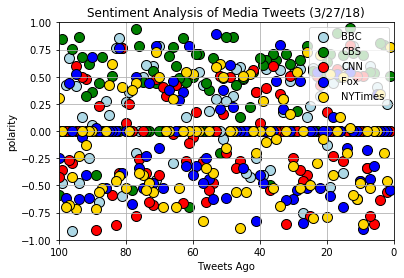

In [617]:
#len_compound = len(BBC_sentiments)

plt.xlabel("Tweets Ago")
plt.ylabel("polarity")
plt.title("Sentiment Analysis of Media Tweets (3/27/18)")

plt.xlim(100,0)
plt.ylim(-1,1)

# #np.arange(len(sentiments_df[sentiments_df["User"] == "@BBC"]), 0, 1)
# #print(len(sentiments_df[sentiments_df["User"]=="@BBC"]))

# r = np.arange(0,100,1)
# print(r)
plt.grid(True)
plt.scatter(BBC_tweets_ago, BBC_sentiments, s = 100, c = "lightblue",edgecolor = "black", label="BBC")
plt.scatter(CBS_tweets_ago, CBS_sentiments, s = 100, c = "green",edgecolor = "black", label="CBS")
plt.scatter(CNN_tweets_ago, CNN_sentiments, s = 100, c = "red",edgecolor = "black", label="CNN")
plt.scatter(Fox_tweets_ago, Fox_sentiments, s = 100, c = "blue",edgecolor = "black", label="Fox")
plt.scatter(NYTimes_tweets_ago, NYTimes_sentiments, s = 100, c = "gold",edgecolor = "black", label="NYTimes")

plt.legend(loc=1)
plt.savefig("sentimentAnalysisMediaTweets.png")
plt.show()

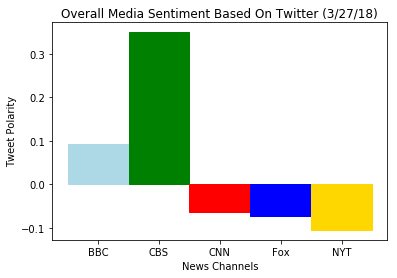

In [618]:
plt.xlabel("News Channels")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter (3/27/18)")

objects = ('BBC', 'CBS', 'CNN', 'Fox', 'NYT')
polarity = [BBC_mean_sentiments,CBS_mean_sentiments, CNN_mean_sentiments, Fox_mean_sentiments, NYTimes_mean_sentiments]
y_pos = np.arange(len(objects))

x = plt.bar(y_pos, polarity, align='center', width=1.0)

x[0].set_color('lightblue')
x[1].set_color('green')
x[2].set_color('red')
x[3].set_color('blue')
x[4].set_color('gold')

plt.xticks(y_pos, objects)
#plt.bar?
plt.savefig("OverallMediaSentimentBar.png")
plt.show()